## Logistic Regression
- Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. 
- Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud,
  Tumor Malignant or Benign. 
- Logistic regression transforms its output using the logistic sigmoid (S-shape) function to return a probability value.
- Popular because of Probability Maximium likelihood and works with continous and Discrete data.
- The hypothesis of logistic regression tends it to limit the cost function between 0 and.

## What is the Sigmoid / Logit Function?
- In order to map predicted values to probabilities, we use the Sigmoid function, with equatation = 1/1+ e'-z where z = m*x + b   (linear regression). The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid   to map predictions to probabilities.

## Binary Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Logistical.csv")
df

,age,brought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


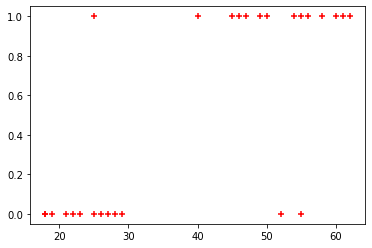

In [3]:
plt.scatter(df.age,df.brought_insurance,marker='+',color='red')
plt.show()

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test =train_test_split(df[['age']],df.brought_insurance,test_size=0.1)

In [7]:
X_test

,age
24,50
22,40
6,55


In [8]:
X_train

,age
14,49
9,61
17,58
7,60
19,18
5,56
0,22
25,54
1,25
16,25


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression().fit(X_train,y_train)

In [11]:
model.predict(X_test)

array([1, 1, 1], dtype=int64)

In [12]:
model.score(X_test,y_test)

0.6666666666666666

In [13]:
model.predict_proba(X_test)

array([[0.11988407, 0.88011593],
       [0.41663619, 0.58336381],
       [0.05614718, 0.94385282]])

## Exercise on HR Analytics Dataset from kaggle 

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("HR_comma_sep.csv")
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


## Data exploration and visualization

In [15]:
left_column_contain_1 = df[df.left==1]
left_column_contain_1.shape

(3571, 10)

In [16]:
left_column_contain_0 = df[df.left==0]
left_column_contain_0.shape

(11428, 10)

In [17]:
# Average numbers for all columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
# From above table we can draw following conclusions,

# Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
# Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)
# Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:xlabel='salary'>

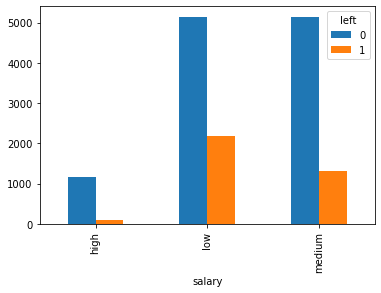

In [19]:
# Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar')
# Above bar chart shows employees with high salaries are likely to not leave the company

<AxesSubplot:xlabel='Department'>

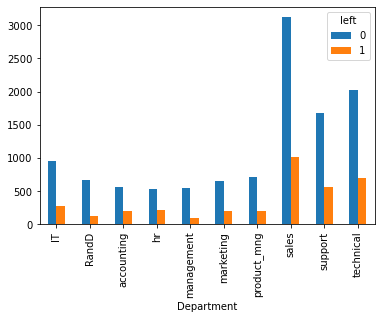

In [20]:
# Department wise employee retention rate
pd.crosstab(df.Department,df.left).plot(kind='bar')
# from below chart concluded some impact but we will ignore this 

#### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary

In [21]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [22]:
# Tackle salary dummy variable
# Salary has all text data
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies.head(3)

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1


In [23]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head(4)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0


In [24]:
# Drop salary column no need further
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [25]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [26]:
y = df.left

In [27]:
# Model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Acccuracy
model.score(X_test,y_test)

0.7826666666666666

## Multiclass classification
- eg vote casting democracy
- identify hand written numbers
- logistic regression for multiclass classification


In [30]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

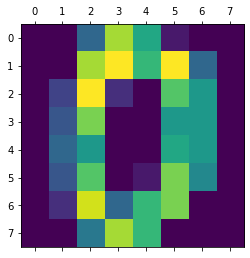

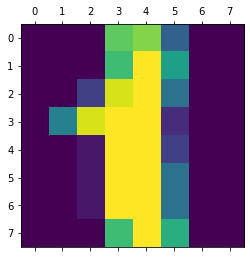

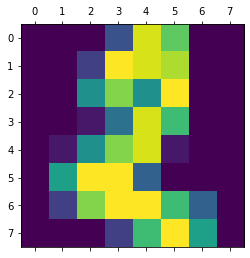

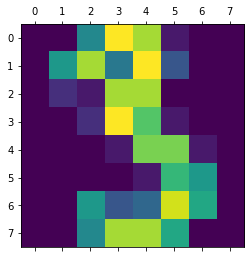

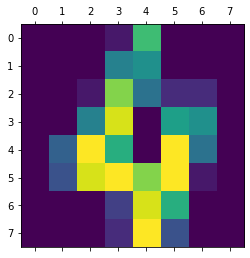

In [31]:
#plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])
# matshow plt func used to show image    

In [32]:
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [33]:
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [34]:
# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Score
model.score(X_test, y_test)

0.9666666666666667

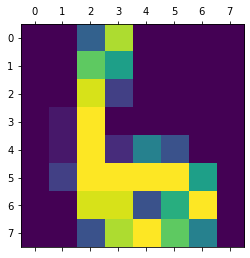

In [36]:
plt.matshow(digits.images[67])

In [37]:
model.predict([digits.data[67]])

array([6])

In [38]:
model.predict(digits.data[0:5])
# already  know see start of multiclass logistic regression

array([0, 1, 2, 3, 4])

In [39]:
# Confusion Matrix
y_predicted = model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

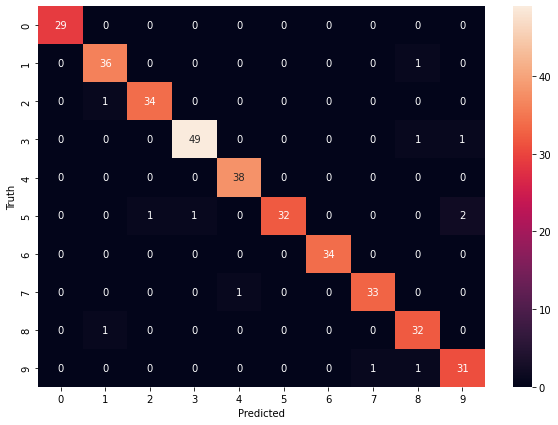

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')